<a href="https://colab.research.google.com/github/bibidemarezoyens/LB/blob/main/plotjes_voor_rowrowrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
complete_df = pd.read_excel('data_roeien.xlsx')

In [ ]:
def opschonen(data):
    ### Onnodige kolommen verwijderen
    complete_df = pd.read_excel(data)
    clean_col_df = complete_df.drop(columns=['datum', 'ploeg', 'zone', 'aantal_intervallen', 'intervaltype', 'interval_afstand', 'interval_tijd', 'interval_nummer', 'rust', 'machine', 'spm', '2k datum'], errors='ignore')

    ### Rijen met lege cellen verwijderen
    clean_row_df = clean_col_df.dropna()

    ### Maak een kopie voor opschonen
    clean_df = clean_row_df.copy()

    ### Komma's naar punten veranderen in ‘500_split’ en ‘2k tijd’ columns en uren veranderen naar minuten (00:01:11.11 wordt 1:11.11)
    for col in ['500_split', '2k tijd']:
        clean_df[col] = clean_df[col].astype(str).str.strip()
        clean_df[col] = clean_df[col].str.replace(',', '.', regex=False)
        clean_df[col] = clean_df[col].str.lstrip('0')
        clean_df[col] = clean_df[col].str.replace('^0:0', '', regex=True)

    ### Verander 'trainingype' naar 'trainingtype'
    clean_df = clean_df.rename(columns={'trainingype': 'trainingtype'})

    return clean_df

In [ ]:
### de minuten veranderen naar seconden

def time_to_seconds(time_str):
    if pd.isna(time_str):
        return None
    try:
        minutes, seconds = map(float, str(time_str).split(':'))
        return minutes * 60 + seconds
    except ValueError:
        return None

def verander_omzetting_seconden(docu):
    docu['500_split'] = docu['500_split'].apply(time_to_seconds)
    docu['2k tijd'] = docu['2k tijd'].apply(time_to_seconds)
    return docu


In [ ]:
groot_roeien_opgeschoond = opschonen('data_roeien.xlsx')
klein_roeien_opgeschoond = opschonen('klein_roeien.xlsx')
groot_dataframe_op_sec = verander_omzetting_seconden(groot_roeien_opgeschoond)
klein_dataframe_op_sec = verander_omzetting_seconden(klein_roeien_opgeschoond)

print(groot_dataframe_op_sec)
print(groot_dataframe_op_sec.columns)


      ervaring geslacht gewichtsklasse   naam trainingtype  500_split  2k tijd
0          1.0        M              Z    z47         5x5'      104.6    379.9
1          1.0        M              Z    z47         5x5'      104.7    379.9
2          1.0        M              Z    z47         5x5'      104.3    379.9
3          1.0        M              Z    z47         5x5'      104.0    379.9
4          1.0        M              Z    z47         5x5'      104.1    379.9
...        ...      ...            ...    ...          ...        ...      ...
7433       1.0        M              L  Z2522       1x2000      397.4    397.4
7434       1.0        M              L  Z2521       1x2000      417.5    417.5
7435       1.0        M              L  Z2520       1x2000      425.0    425.0
7436       1.0        M              Z  Z2517       1x2000      399.1    399.1
7437       1.0        M              Z  Z2519       1x2000      377.0    377.0

[5904 rows x 7 columns]
Index(['ervaring', 'geslach

<ipython-input-37-64a9c4fa6f74>:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(data=groot_dataframe_op_sec[groot_dataframe_op_sec['geslacht'] == 'M'][groot_dataframe_op_sec['gewichtsklasse'] == 'Z']['500_split'],
<ipython-input-37-64a9c4fa6f74>:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=groot_dataframe_op_sec[groot_dataframe_op_sec['geslacht'] == 'M'][groot_dataframe_op_sec['gewichtsklasse'] == 'Z']['500_split'],
<ipython-input-37-64a9c4fa6f74>:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(data=groot_dataframe_op_sec[groot_dataframe_op_sec['geslacht'] == 'M'][groot_dataframe_op_sec['gewichtsklasse'] == 'L']['500_split'],
<ipython-input-37-64a9c4fa6f74>:46: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an 

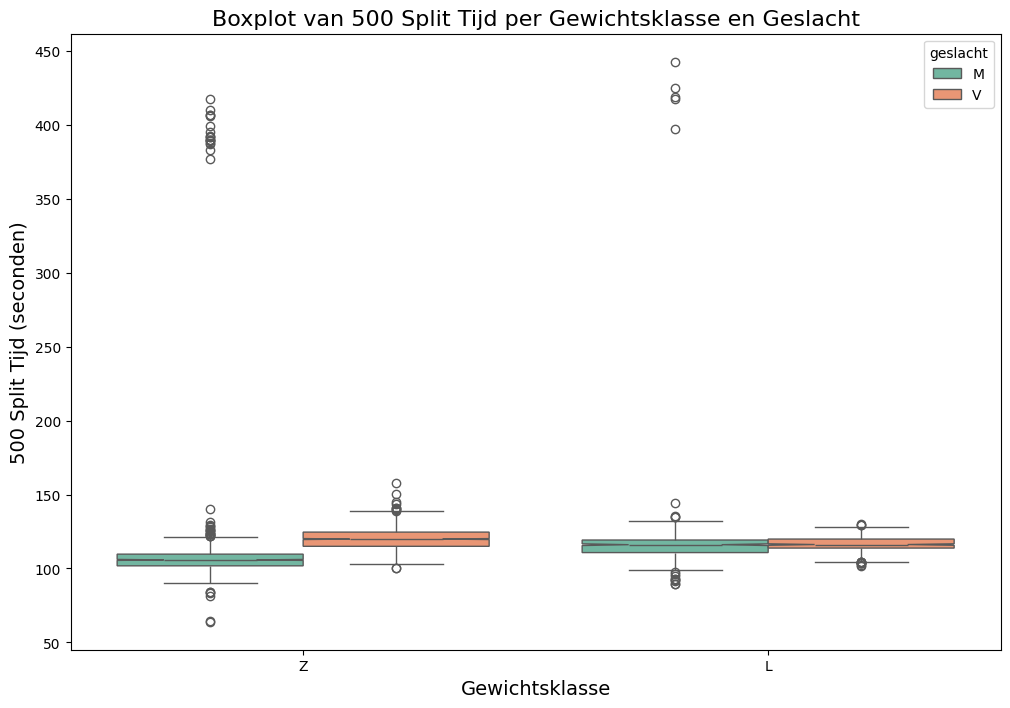

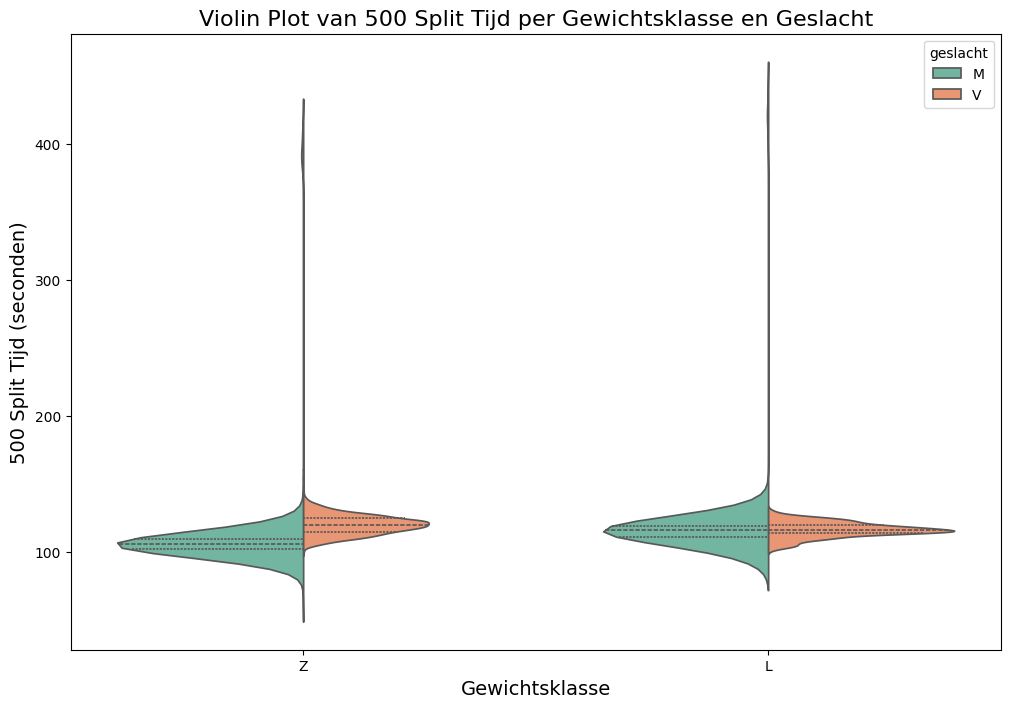

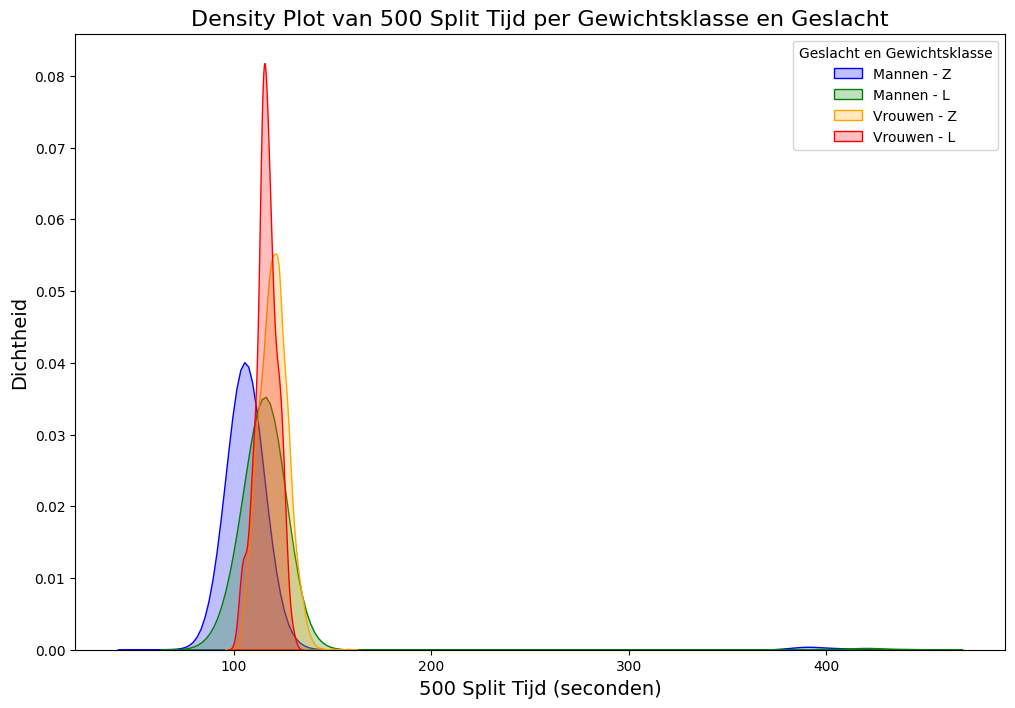

In [ ]:
# Zet de '500_split' kolom om naar numerieke waarden, vervang ongeldige waarden door NaN
groot_dataframe_op_sec['500_split'] = pd.to_numeric(groot_dataframe_op_sec['500_split'], errors='coerce')

#Verwijder rijen waar '500_split' NaN is
groot_dataframe_op_sec = groot_dataframe_op_sec.dropna(subset=['500_split'])

# BOXPLOT
plt.figure(figsize=(12, 8))

# Maak de boxplot met de gefilterde data voor Z en L per geslacht
sns.boxplot(x='gewichtsklasse', y='500_split', hue='geslacht', data=groot_dataframe_op_sec,
            palette='Set2', notch=True)

# Voeg titels en labels toe voor de boxplot
plt.title("Boxplot van 500 Split Tijd per Gewichtsklasse en Geslacht", fontsize=16)
plt.xlabel("Gewichtsklasse", fontsize=14)
plt.ylabel("500 Split Tijd (seconden)", fontsize=14)


# VIOLIN PLOT
plt.figure(figsize=(12, 8))

# Maak de violin plot voor de 500_split tijden per geslacht en gewichtsklasse
sns.violinplot(x='gewichtsklasse', y='500_split', hue='geslacht', data=groot_dataframe_op_sec,
               inner='quart', palette='Set2', split=True)

plt.title("Violin Plot van 500 Split Tijd per Gewichtsklasse en Geslacht", fontsize=16)
plt.xlabel("Gewichtsklasse", fontsize=14)
plt.ylabel("500 Split Tijd (seconden)", fontsize=14)


# DENSITY PLOT
plt.figure(figsize=(12, 8))

# Maak de density plot voor de 500_split tijden per geslacht en gewichtsklasse
sns.kdeplot(data=groot_dataframe_op_sec[groot_dataframe_op_sec['geslacht'] == 'M'][groot_dataframe_op_sec['gewichtsklasse'] == 'Z']['500_split'],
            label='Mannen - Z', shade=True, color='blue')
sns.kdeplot(data=groot_dataframe_op_sec[groot_dataframe_op_sec['geslacht'] == 'M'][groot_dataframe_op_sec['gewichtsklasse'] == 'L']['500_split'],
            label='Mannen - L', shade=True, color='green')
sns.kdeplot(data=groot_dataframe_op_sec[groot_dataframe_op_sec['geslacht'] == 'V'][groot_dataframe_op_sec['gewichtsklasse'] == 'Z']['500_split'],
            label='Vrouwen - Z', shade=True, color='orange')
sns.kdeplot(data=groot_dataframe_op_sec[groot_dataframe_op_sec['geslacht'] == 'V'][groot_dataframe_op_sec['gewichtsklasse'] == 'L']['500_split'],
            label='Vrouwen - L', shade=True, color='red')

plt.title("Density Plot van 500 Split Tijd per Gewichtsklasse en Geslacht", fontsize=16)
plt.xlabel("500 Split Tijd (seconden)", fontsize=14)
plt.ylabel("Dichtheid", fontsize=14)

# Voeg een legenda toe
plt.legend(title="Geslacht en Gewichtsklasse")

# Toon de density plot
plt.show()


In [ ]:
### per persoon per training de gemiddelde 500_split berekenen

def gemid_split(data):

    gemid_data = (data.groupby(['naam', 'trainingtype'], as_index=False).agg({'ervaring': 'first', 'geslacht': 'first', 'gewichtsklasse': 'first', '500_split': 'mean', '2k tijd': 'first'}))

    return gemid_data

klein_gemid_df = gemid_split(klein_dataframe_op_sec)
print(klein_gemid_df)
groot_gemid_df = gemid_split(groot_dataframe_op_sec)
print(groot_gemid_df)

  naam trainingtype  ervaring geslacht gewichtsklasse   500_split  2k tijd
0  z47        3x20'       1.0        M              Z  116.666667    379.9
1  z47         5x5'       1.0        M              Z  104.340000    379.9
2  z50         5x5'       1.0        M              Z  104.740000    390.2
3  z52        3x15'       1.0        M              Z  120.733333    382.2
4  z52        3x20'       1.0        M              Z  119.133333    382.2
5  z52         5x5'       1.0        M              Z  104.800000    382.2
6  z54        3x15'       1.0        M              Z  119.866667    392.0
7  z54        3x20'       1.0        M              Z  120.666667    392.0
8  z54         5x5'       1.0        M              Z  108.400000    392.0
      naam trainingtype  ervaring geslacht gewichtsklasse   500_split  2k tijd
0     D251       1x1500       0.0        V              Z         NaN    480.2
1     D251    2x10'/3'r       0.0        V              Z         NaN    480.2
2     D251   

In [ ]:
### een dictionary maken van alle gegevens per persoon

import json

def dict_per_naam(data):
  naam_dict = {}

  for i in range(len(data)):
      row = data.iloc[i].to_dict()

      name = row.pop('naam')
      constants = {key: row.pop(key) for key in ['ervaring', 'geslacht', 'gewichtsklasse', '2k tijd']}

      if name not in naam_dict:
          naam_dict[name] = {'gegevens': constants, 'tijden': []}

      naam_dict[name]['tijden'].append(row)

  print(json.dumps(naam_dict, indent=4, sort_keys=False))

  return naam_dict

klein_namen_dict = dict_per_naam(klein_dataframe_op_sec)
gemid_klein_namen_dict = dict_per_naam(klein_gemid_df)

{
    "z47": {
        "gegevens": {
            "ervaring": 1.0,
            "geslacht": "M",
            "gewichtsklasse": "Z",
            "2k tijd": 379.9
        },
        "tijden": [
            {
                "trainingtype": "5x5'",
                "500_split": 104.6
            },
            {
                "trainingtype": "5x5'",
                "500_split": 104.7
            },
            {
                "trainingtype": "5x5'",
                "500_split": 104.3
            },
            {
                "trainingtype": "5x5'",
                "500_split": 104.0
            },
            {
                "trainingtype": "5x5'",
                "500_split": 104.1
            },
            {
                "trainingtype": "3x20'",
                "500_split": 115.5
            },
            {
                "trainingtype": "3x20'",
                "500_split": 117.0
            },
            {
                "trainingtype": "3x20'",
                "500_spli

In [ ]:
# groot_namen_dict = dict_per_naam(groot_dataframe_op_sec[:1000])
# gemid_groot_namen_dict = dict_per_naam(groot_gemid_df)

gemid_klein_namen_dict = dict_per_naam(klein_gemid_df)

{
    "z47": {
        "gegevens": {
            "ervaring": 1.0,
            "geslacht": "M",
            "gewichtsklasse": "Z",
            "2k tijd": 379.9
        },
        "tijden": [
            {
                "trainingtype": "3x20'",
                "500_split": 116.66666666666667
            },
            {
                "trainingtype": "5x5'",
                "500_split": 104.34
            }
        ]
    },
    "z50": {
        "gegevens": {
            "ervaring": 1.0,
            "geslacht": "M",
            "gewichtsklasse": "Z",
            "2k tijd": 390.2
        },
        "tijden": [
            {
                "trainingtype": "5x5'",
                "500_split": 104.74000000000001
            }
        ]
    },
    "z52": {
        "gegevens": {
            "ervaring": 1.0,
            "geslacht": "M",
            "gewichtsklasse": "Z",
            "2k tijd": 382.2
        },
        "tijden": [
            {
                "trainingtype": "3x15'",
       

In [ ]:
from sklearn.model_selection import train_test_split

# Data inladen
df = groot_gemid_df

# Eerst de data opschudden om bias te voorkomen
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Zorg ervoor dat elke ervaring, geslacht en gewichtsklasse in elke set vertegenwoordigd zijn
train_data = pd.DataFrame()
val_data = pd.DataFrame()
test_data = pd.DataFrame()

for ervaring in df['ervaring'].unique():
    for geslacht in df['geslacht'].unique():
        for gewichtsklasse in df['gewichtsklasse'].unique():
            subset = df[(df['ervaring'] == ervaring) & (df['geslacht'] == geslacht) & (df['gewichtsklasse'] == gewichtsklasse)]
            if not subset.empty:
                temp_train, temp_temp = train_test_split(subset, test_size=0.3, random_state=42)
                temp_val, temp_test = train_test_split(temp_temp, test_size=0.5, random_state=42)
                train_data = pd.concat([train_data, temp_train])
                val_data = pd.concat([val_data, temp_val])
                test_data = pd.concat([test_data, temp_test])

# Reset indexen
train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Controleren op juiste verdeling
print(f"Trainingsdata: {len(train_data)} rijen")
print(f"Validatiedata: {len(val_data)} rijen")
print(f"Testdata: {len(test_data)} rijen")

# Optioneel: data opslaan in aparte bestanden
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

Trainingsdata: 849 rijen
Validatiedata: 182 rijen
Testdata: 186 rijen
